Ссылка на презентацию: https://drive.google.com/file/d/1smE1BAKXU7EETTV0QDUl_wo8UUy4eSPE/view?usp=sharing

# Рынок заведений общественного питания Москвы

Задачи проекта:

 - Выявить, сколько всего видов общественного питания в Москве и их количество;
 - Выявить, сколько сетевых и несетевых заведений;
 - Выявить, для какого вида общественного питания характерно сетевое распространение;
 - Выявить, что характерно для сетевых заведений: много заведений с маленьким количеством посадочных мест или мало заведений с большим количеством посадочных мест;
 - Выявить количество посадочных мест для каждого из вида общественного питания;
 - Создать отдельный столбец с названием улицы;
 - Выявить топ 10 улиц с наибольшим количеством заведений;
 - Посчитать сколько улиц в Москве с один заведением общественного питания;
 - Выявить среднее количество посадочных мест для улиц с большим количеством объектов общественного питания.

## Шаг №1. Загрузка данных и подготовка их к анализу

In [1]:
#импортируем необходимые библиотеки

import pandas as pd
from pymystem3 import Mystem
m = Mystem()
import plotly.express as px
from numpy import median
import seaborn as sns
from io import BytesIO
import requests
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#откроем таблицу о заведениях общественного питания Москвы и выведем её на экран
rest_data = pd.read_csv('/datasets/rest_data.csv')
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
# посмотрим основную информацию по таблицу rest_data
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)

In [5]:
# Приведём object_name к нижнему регистру 
rest_data['object_name'] = rest_data['object_name'].str.lower()

In [6]:
# переименуем имеющиеся некоторые кафе в общие группы или названия

def category_purpose(row):
    lem_object = m.lemmatize(row)
    if 'школьный' in lem_object:
        return 'столовая при школе'
    if 'старбакс' in lem_object:
        return 'starbucks'
    if 'сабвевать' in lem_object:
        return 'subway'
    if 'школа' in lem_object:
        return 'столовая при школе'
    if 'вок' in lem_object:
        return 'суши wok'
    if 'kfc' in lem_object:
        return 'kfc'
    if 'макдоналдс' in lem_object:
        return 'макдоналдс'
    if 'king' in lem_object:
        return 'burger king'
    if 'кинг' in lem_object:
        return 'burger king'
    if 'караваев' in lem_object:
        return 'кулинарная лавка братьев караваевых'
    if 'сош' in lem_object:
        return 'столовая при школе'
    if 'шоколадница' in lem_object:
        return 'шоколадница'
    if 'теремок' in lem_object:
        return 'теремок'
    if 'хаус' in lem_object:
        return 'кофе хаус'
    if 'танука' in lem_object:
        return 'тануки'
    if 'якитория' in lem_object:
        return 'якитория'
    if 'dominos' in lem_object:
        return 'dominos пицца'
    if 'домино' in lem_object:
        return 'dominos пицца'
    if 'му' in lem_object:
        return 'му-му'
    if 'шаурма' in lem_object:
        return 'шаурма'
    if 'шк' in lem_object:
        return 'столовая при школе'
    else:
        return row


rest_data['object_name']=rest_data['object_name'].apply(category_purpose)

Таблица содержит 15366 строк и нет ни одного пропуска, это хорошо. Типы данных каждого из столбцов имеют правильный вид.

In [7]:
# Проверим таблицу на дубликаты
print('В таблице', rest_data.duplicated().sum(), 'дубликатов')

В таблице 0 дубликатов


In [8]:
# посмотрим основные числовые характеристики для rest_data
rest_data.describe()

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


### Вывод

Таблица имеет 15366 сток и 6 столбцов:

 - id — идентификатор объекта;
 - object_name — название объекта общественного питания;
 - chain — сетевой ресторан;
 - object_type — тип объекта общественного питания;
 - address — адрес;
 - number — количество посадочных мест.

В таблице нет пропусков и дубликатов, типы данных соотвествуют данным для каждого из столбцов.

## Шаг №2. Анализ данных.

### Исследование соотношение видов объектов общественного питания по количеству.

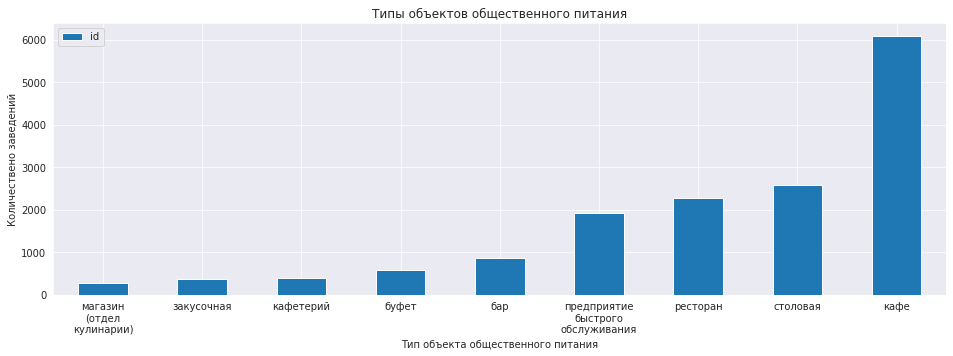

In [9]:
sns.set_style("darkgrid") 

# Сгруппируем таблицу по типу объекта общественного питания и посчитаем их количество
rest_data.groupby('object_type').agg({'id': 'nunique'}).sort_values('id', ascending = True).plot(figsize=(16, 5), kind = 'bar')

# Добавим подписи к графику
plt.title('Типы объектов общественного питания')
plt.xlabel('Тип объекта общественного питания')
plt.ylabel('Количествено заведений')


xlabels = ['магазин (отдел кулинарии)', 'закусочная', 'кафетерий', 'буфет', 'бар', 'предприятие быстрого обслуживания',
           'ресторан', 'столовая', 'кафе']

# xlabels_new = [re.sub("(.{9})", "\\1\n", label, 0, re.DOTALL) for label in xlabels]
xlabels_new = ["\n".join(label.split()) for label in xlabels]
plt.xticks(range(9), xlabels_new, rotation=0)
plt.show();

#### Вывод

Больше всего заведений с типом "Кафе" - их около 6 тысяч.

Далее идут такие типы заведений, как "столовая", "ресторан" и "предприятие быстрого обслуживания". Они имеют от 2000 до 2500 заведений в Москве. 

Меньше всего в Москве заведений с типом "магазин (отдел кулинарии)". Их всего около 250.

### Соотношение сетевых и несетевых заведений по количеству.

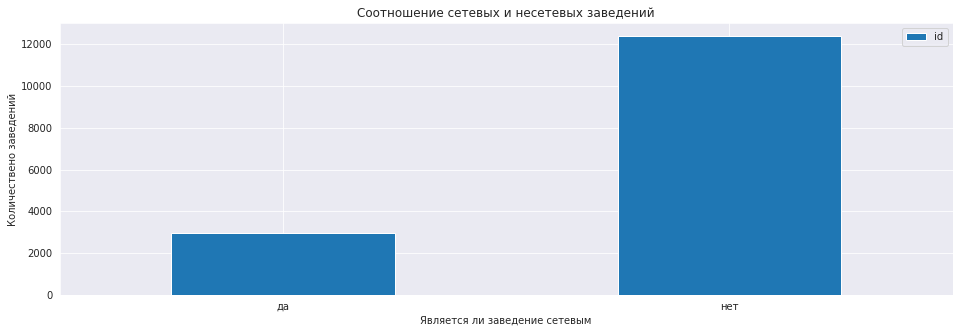

In [10]:
sns.set_style("darkgrid") 

# Сгруппируем таблицу по типу объекта общественного питания и посчитаем их количество
rest_data.groupby('chain').agg({'id': 'nunique'}).sort_values('id', ascending = True).plot(figsize=(16, 5), kind = 'bar')

# Добавим подписи к графику
plt.title('Соотношение сетевых и несетевых заведений')
plt.xlabel('Является ли заведение сетевым')
plt.ylabel('Количествено заведений')
plt.xticks(rotation=0);

#### Вывод

В Москве больше всего несетевых заведений. Их больше 12 тысяч. Сетевых же заведений в Москве около 3000.

### Для какого вида объекта общественного питания характерно сетевое распространение?

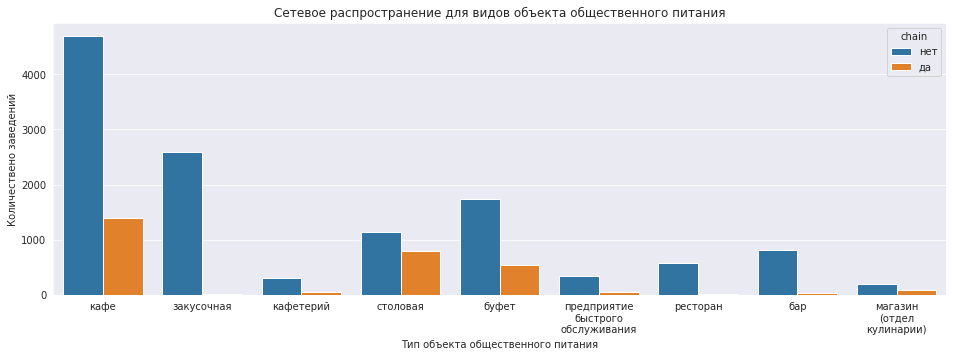

In [11]:
rest_data_1 = rest_data.copy()
rest_data_1['x'] = rest_data_1['id'] / rest_data_1['id']

# Укажем размер графика
plt.figure(figsize=(16, 5))
sns.set_style("darkgrid") 

# Создадим график по типу объекта и количеству заведений и вызовем третье измерение, является ли заведение сетевым рестораном
sns.barplot(x="object_type", y="x", hue="chain", data=rest_data_1, estimator=sum)

# Добавим подписи к графику
plt.title('Сетевое распространение для видов объекта общественного питания')
plt.xlabel('Тип объекта общественного питания')
plt.ylabel('Количествено заведений')
xlabels = ['кафе', 'закусочная', 'кафетерий', 'столовая', 'буфет', 'предприятие быстрого обслуживания',
           'ресторан', 'бар', 'магазин (отдел кулинарии)']
xlabels_new = ["\n".join(label.split()) for label in xlabels]
plt.xticks(range(9), xlabels_new, rotation=0);

In [12]:
rest_data.groupby('object_type')['chain'].value_counts()

object_type                        chain
бар                                нет       819
                                   да         37
буфет                              нет       574
                                   да         11
закусочная                         нет       304
                                   да         56
кафе                               нет      4703
                                   да       1396
кафетерий                          нет       346
                                   да         52
магазин (отдел кулинарии)          нет       195
                                   да         78
предприятие быстрого обслуживания  нет      1132
                                   да        791
ресторан                           нет      1741
                                   да        544
столовая                           нет      2584
                                   да          3
Name: chain, dtype: int64

#### Вывод

Сетевое распространение характерно для следующих заведений в следующих пропорциях:

 - Для кафе 23%
 - Для ресторанов 23%
 - Для магазинов с отделом кулинарии 28%
 - Для предприятий быстрого питания 41%

###  Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [13]:
# Создадим новую таблицу, в которой будет информация только по сетевым заведениям
rest_data_network = rest_data.loc[rest_data['chain'] == 'да']

# Создадим новую таблицу группировкой и будем дальше её трансформировать
rest_data_5 = rest_data_network.groupby('object_name').agg({'id': 'count', 'number': 'mean'})

In [14]:
# Создадим 2 набора данных, по которым мы будем создавать дальшейную сортировку
bin_labels_2 = ['мало мест', 'много мест']
bin_labels_2_2 = ['много заведений', 'мало заведений']

# Создадим сортировку по количеству мест в заведении
rest_data_5['quantile'] = pd.qcut(rest_data_5['number'],
                              q=[0, .7, 1],
                              labels=bin_labels_2)

# Создадим сортировку по количеству заведений
rest_data_5['quantile_2'] = pd.qcut(rest_data_5['id'],
                              q=[0, .7, 1],
                              labels=bin_labels_2_2)

# Создадим единую столбец с количеством заведений и мест в них
rest_data_5['Name'] = rest_data_5[['quantile', 'quantile_2']].apply(lambda row: (row[0],row[1]),axis=1)

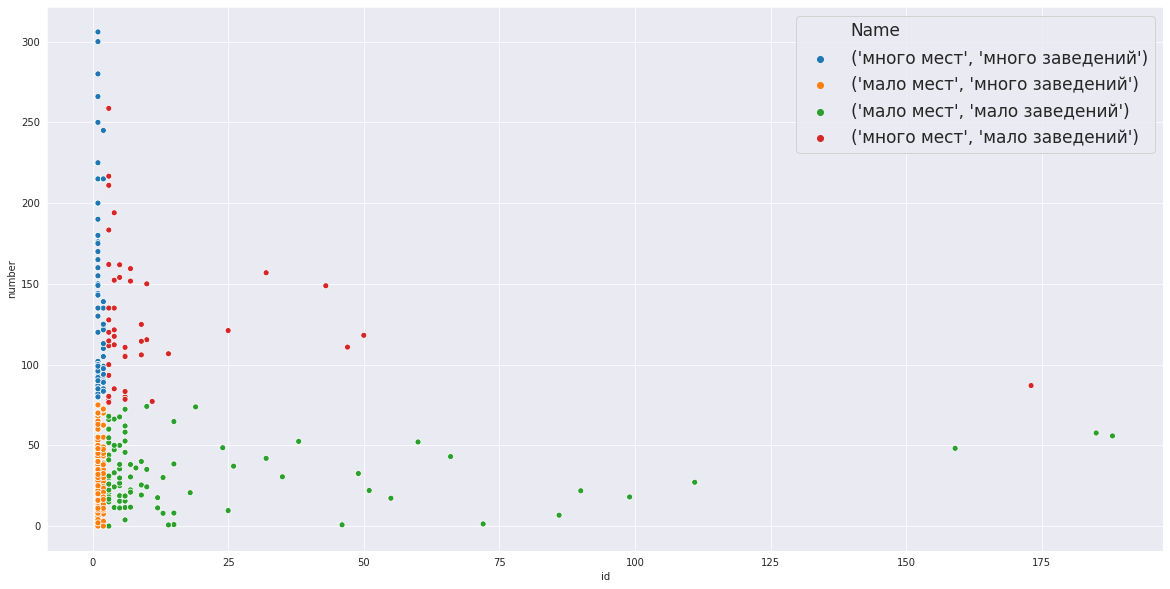

In [15]:
# Создадим наш график с цветовой разметкой количества заведений и мест в них
plt.figure(figsize=(20,10))
sns.scatterplot(data=rest_data_5, x="id", y="number", hue="Name")
plt.legend(prop={'size': 17});

#### Вывод

По данному графику можно сделать вывод, что для сетевых заведений характерно много заведений с небольшим количество мест. В средней около 40 мест на одно заведение.

###  Среднее количество посадочных мест для каждого вида объекта общественного питания.

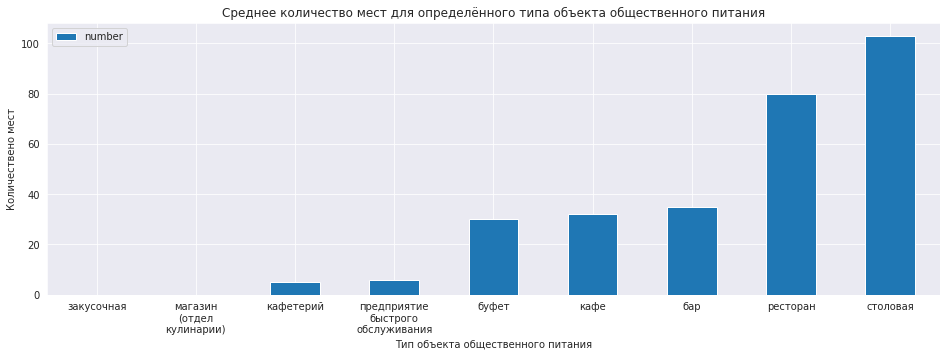

In [16]:
sns.set_style("darkgrid") 

# Сгруппируем таблицу по типу объекта общественного питания и посчитаем медиану по количеству мест
rest_data.groupby('object_type').agg({'number': 'median'}).sort_values('number', ascending = True).plot(figsize=(16, 5), kind = 'bar')

# Добавим подписи к графику
plt.title('Среднее количество мест для определённого типа объекта общественного питания')
plt.xlabel('Тип объекта общественного питания')
plt.ylabel('Количествено мест')
xlabels = ['закусочная', 'магазин (отдел кулинарии)', 'кафетерий', 'предприятие быстрого обслуживания', 'буфет',
           'кафе', 'бар', 'ресторан', 'столовая']
xlabels_new = ["\n".join(label.split()) for label in xlabels]
plt.xticks(range(9), xlabels_new, rotation=0);

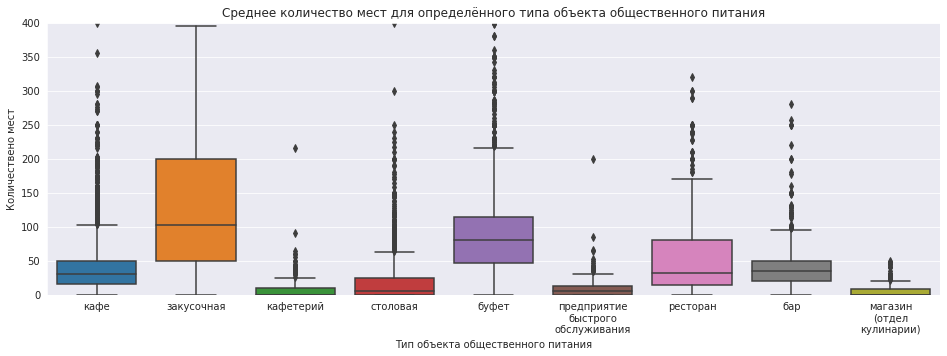

In [17]:
# и создадим общие коробки с усами
plt.figure(figsize=(16, 5))
sns.set_style("darkgrid") 
sns.boxplot(x='object_type', y='number', data=rest_data)
plt.title('Среднее количество мест для определённого типа объекта общественного питания')
plt.xlabel('Тип объекта общественного питания')
plt.ylabel('Количествено мест')
plt.ylim(0,400)
xlabels = ['кафе', 'закусочная', 'кафетерий', 'столовая', 'буфет', 'предприятие быстрого обслуживания',
           'ресторан', 'бар', 'магазин (отдел кулинарии)']
xlabels_new = ["\n".join(label.split()) for label in xlabels]
plt.xticks(range(9), xlabels_new, rotation=0);

#### Вывод

Больше всего мест предлагают столовые - в среднем 100 мест. 

Дальше идут рестораны, в среднем с 80 количеством посадочных мест. 

Меньше всего посадочных мест у предприятий быстрого обслуживания и кафетериях, у них в среднем 6-7 посадочных места.

### Создание столбца с информацией об улице.

In [18]:
# делаем из адреса датафрейм с его частями
split_address = rest_data['address'].str.split(', ', expand=True)

# включаем в регулярное выражение значения для фильтрации
filter_regex = 'город|дом|корпус|строение|поселение|деревня|посёлок|село|владение|сооружение|дачный|рабочий'

# проходимся циклом по всем столбцам и заменяем ячейки, включающие ненужные значения, на пустые значения
for col in split_address.columns:
     split_address.loc[split_address[col].str.match(filter_regex, na=False, case=False), col] = None

# обратно соединяем в новый столбец куски адреса без ненужных частей
rest_data['streetname'] = split_address.apply(lambda x: x.str.cat(sep=', ', join='left'), axis=1)

In [19]:
# возьмём информацию из интернета по районам и улицам
spreadsheet_id = '18F8HNE8ONdJEJA7xA_-Q3jQybRAqPRWxYk7TNv4iU0A'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
districts = pd.read_csv(BytesIO(r.content))
districts.head()

# объединим наши таблицы
rest_data = rest_data.merge(districts, on='streetname')

### График топ-10 улиц по количеству объектов общественного питания.

In [20]:
# Посмотрим 10 улиц с самым большим количество заведений
rest_data.groupby('streetname').agg({'id': 'nunique'}).sort_values('id', ascending = False).head(10)

,id
streetname,
проспект Мира,204
Профсоюзная улица,183
Ленинградский проспект,173
Пресненская набережная,167
Варшавское шоссе,162
Ленинский проспект,148
проспект Вернадского,132
Кутузовский проспект,114
Каширское шоссе,112


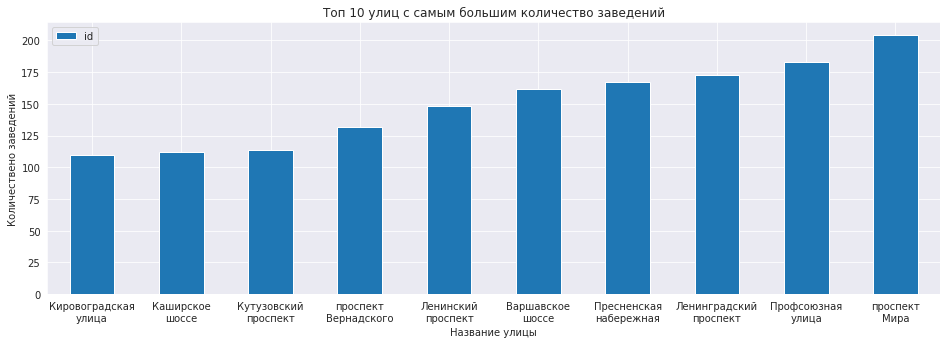

In [21]:
# Создадим переменную с нашими 10 улицами
streets = ['проспект Мира', 'Профсоюзная улица', 'Ленинградский проспект', 'Пресненская набережная',
           'Варшавское шоссе', 'Ленинский проспект', 'проспект Вернадского', 'Кутузовский проспект',
           'Каширское шоссе', 'Кировоградская улица']

# Создадим новую таблицу, в которой будет информация только по сетевым заведениям
rest_data_10_streets = rest_data.query('streetname == @streets')
sns.set_style("darkgrid") 

rest_data_10_streets.groupby('streetname').agg({'id': 'nunique'}).sort_values('id', ascending = True).plot(figsize=(16, 5), kind = 'bar')


# Добавим подписи к графику
plt.title('Топ 10 улиц с самым большим количество заведений')
plt.xlabel('Название улицы')
plt.ylabel('Количествено заведений')
xlabels = ['Кировоградская улица', 'Каширское шоссе', 'Кутузовский проспект', 'проспект Вернадского', 
           'Ленинский проспект', 'Варшавское шоссе', 'Пресненская набережная', 'Ленинградский проспект',
           'Профсоюзная улица', 'проспект Мира']
xlabels_new = ["\n".join(label.split()) for label in xlabels]
plt.xticks(range(10), xlabels_new, rotation=0);

In [22]:
# выведем таблицу только с названием улицы, округа и района
districts_10 = districts.query('streetname == @streets')
districts_10.sort_values('streetname', ascending = True)

,streetname,areaid,okrug,area
3241,Варшавское шоссе,99,ЮАО,Донской район
4065,Варшавское шоссе,133,ЮЗАО,Район Южное Бутово
3125,Варшавское шоссе,110,ЮАО,Район Чертаново Южное
3999,Варшавское шоссе,130,ЮЗАО,Район Северное Бутово
3117,Варшавское шоссе,108,ЮАО,Район Чертаново Северное
3105,Варшавское шоссе,109,ЮАО,Район Чертаново Центральное
3349,Варшавское шоссе,104,ЮАО,Нагорный район
3305,Варшавское шоссе,102,ЮАО,Район Нагатино-Садовники
3308,Каширское шоссе,102,ЮАО,Район Нагатино-Садовники
3292,Каширское шоссе,101,ЮАО,Район Москворечье-Сабурово


По последней таблице видно, что наши топ 10 улиц проходит через большое количество районов, создадим альтернативный список топ_10.

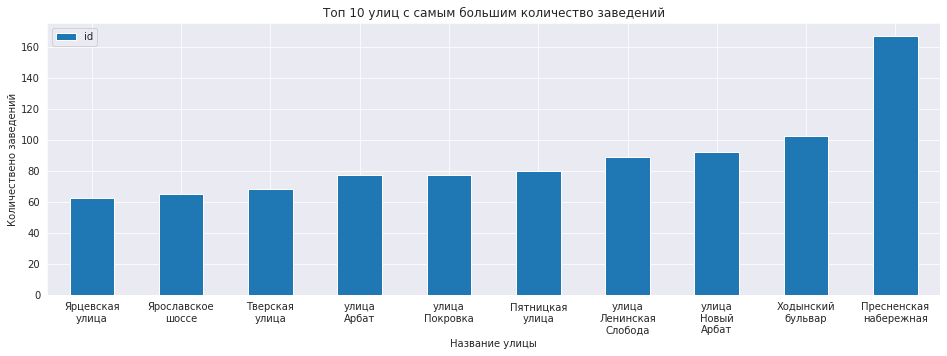

In [23]:
streets_2 = [
    'Пресненская набережная', 'Пятницкая улица', 'Тверская улица', 'Ходынский бульвар', 'Ярославское шоссе',
    'улица Арбат', 'улица Ленинская Слобода', 'улица Новый Арбат', 'улица Покровка', 'Ярцевская улица']

# Создадим новую таблицу, в которой будет информация только по сетевым заведениям
rest_data_10_streets_2 = rest_data.query('streetname == @streets_2')
sns.set_style("darkgrid") 

rest_data_10_streets_2.groupby('streetname').agg({'id': 'nunique'}).sort_values('id', ascending = True).plot(figsize=(16, 5), kind = 'bar')


# Добавим подписи к графику
plt.title('Топ 10 улиц с самым большим количество заведений')
plt.xlabel('Название улицы')
plt.ylabel('Количествено заведений')
xlabels = ['Ярцевская улица', 'Ярославское шоссе', 'Тверская улица', 'улица Арбат', 
           'улица Покровка', 'Пятницкая улица', 'улица Ленинская Слобода', 'улица Новый Арбат',
           'Ходынский бульвар', 'Пресненская набережная']
xlabels_new = ["\n".join(label.split()) for label in xlabels]
plt.xticks(range(10), xlabels_new, rotation=0);

In [24]:
# выведем таблицу только с названием улицы, округа и района
districts_10_2 = districts.query('streetname == @streets_2')
districts_10_2.sort_values('streetname', ascending = True)

,streetname,areaid,okrug,area
72,Пресненская набережная,17,ЦАО,Пресненский район
540,Пятницкая улица,14,ЦАО,Район Замоскворечье
327,Тверская улица,19,ЦАО,Тверской район
2013,Ходынский бульвар,69,САО,Хорошевский район
2402,Ярославское шоссе,86,СВАО,Ярославский Район
1361,Ярцевская улица,40,ЗАО,Район Кунцево
490,улица Арбат,12,ЦАО,Район Арбат
3182,улица Ленинская Слобода,98,ЮАО,Даниловский район
604,улица Новый Арбат,12,ЦАО,Район Арбат
2279,улица Покровка,13,ЦАО,Басманный район


In [25]:
rest_data_10_streets_2.groupby('streetname').agg({'id': 'nunique'}).sort_values('id', ascending = False)

,id
streetname,
Пресненская набережная,167
Ходынский бульвар,102
улица Новый Арбат,92
улица Ленинская Слобода,89
Пятницкая улица,80
улица Арбат,77
улица Покровка,77
Тверская улица,68
Ярославское шоссе,65


#### Вывод

На улицах, какие вошли в топ 10 с самым большим количеством заведений находится от 62 (Ярцевская улица) до 167 заведений (Пресненская набережная).

 1) **Ярцевская улица** имеет 62 заведения и проходит через район Кунцево.
 
 2) **Ярославское шоссе** имеет 65 заведений и проходит через Ярославский район
 
 3) **Тверская улица** имеет 68 заведений и проходит через Тверской район.
 
 4) **улица Арбат** имеет 77 заведений и проходит через район Арбат.
 
 5) **улица Покровка** имеет 77 заведений и проходит через Бассманный район
 
 6) **Пятницкая улица** имеет 80 заведений и проходит через Район Замоскворечье.
 
 7) **улица Ленинская Слобода** имеет 89 заведений и проходит через Даниловский район.
 
 8) **улица Новый Арбат** имеет 92 заведения и проходит через Район Арбат.
 
 9) **Ходынский бульвар** имеет 102 заведения и проходит через Хорошевский район.
 
 10) **Пресненская набережная** имеет 167 заведений и проходит через Пресненский район.

### Сколько улиц с одним объектом общественного питания. 

In [26]:
# Посмотрим 10 улиц с самым большим количество заведений
data = rest_data.groupby('streetname').agg({'id': 'nunique'}).sort_values('id', ascending = True)

# Создадим новую таблицу, в которой будет информация только по сетевым заведениям
rest_data_1_institution = data.query('id == 1')

# Посмотрим длину таблицы
print('Всего у нас', len(rest_data_1_institution), 'улиц с одним заведением на улицу')

Всего у нас 521 улиц с одним заведением на улицу


In [27]:
# Объединим нашу таблицу с 521 улицей с таблицей округов и районов
rest_data_1_institution =  rest_data_1_institution.merge(districts, on='streetname')
rest_data_1_institution.groupby('area').agg({'id': 'count'}).sort_values('id', ascending = False).head()

,id
area,
Таганский район,27
Район Хамовники,26
Басманный район,25
Тверской район,20
Пресненский район,20


#### Вывод

Всего 521 улиц с одним заведением. Они есть в каждом районе Москвы.

Больше всего их в Таганском, Басманном районах и районе Хамовники. Здесь больше 25 улиц в каждом районе, где по одному заведению.

### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.

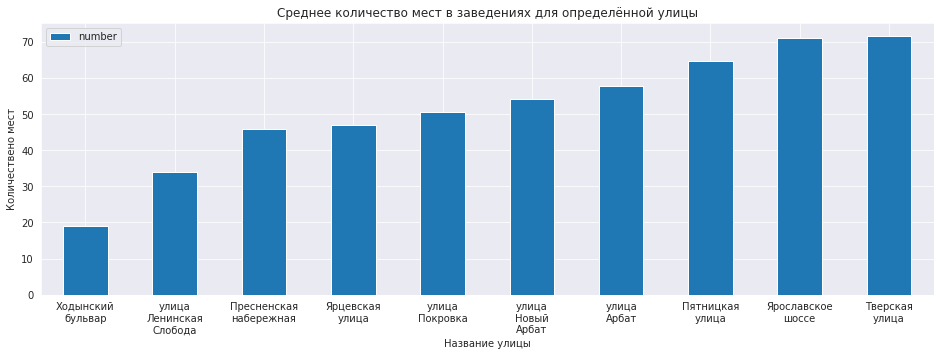

In [28]:
sns.set_style("darkgrid") 

# Сгруппируем таблицу по типу объекта общественного питания и посчитаем медиану по количеству мест
rest_data_10_streets_2.groupby('streetname').agg({'number': 'mean'}).sort_values('number', ascending = True).plot(figsize=(16, 5), kind = 'bar')

# Добавим подписи к графику
plt.title('Среднее количество мест в заведениях для определённой улицы')
plt.xlabel('Название улицы')
plt.ylabel('Количествено мест')
xlabels = ['Ходынский бульвар', 'улица Ленинская Слобода', 'Пресненская набережная', 'Ярцевская улица',
           'улица Покровка', 'улица Новый Арбат', 'улица Арбат', 'Пятницкая улица', 'Ярославское шоссе', 
           'Тверская улица']
xlabels_new = ["\n".join(label.split()) for label in xlabels]
plt.xticks(range(10), xlabels_new, rotation=0);

По данному графику можно сказать, что больше всего посадочных мест предлагает Тверская улица и Ярославское шоссе. Больше 70 мест на одно заведение.

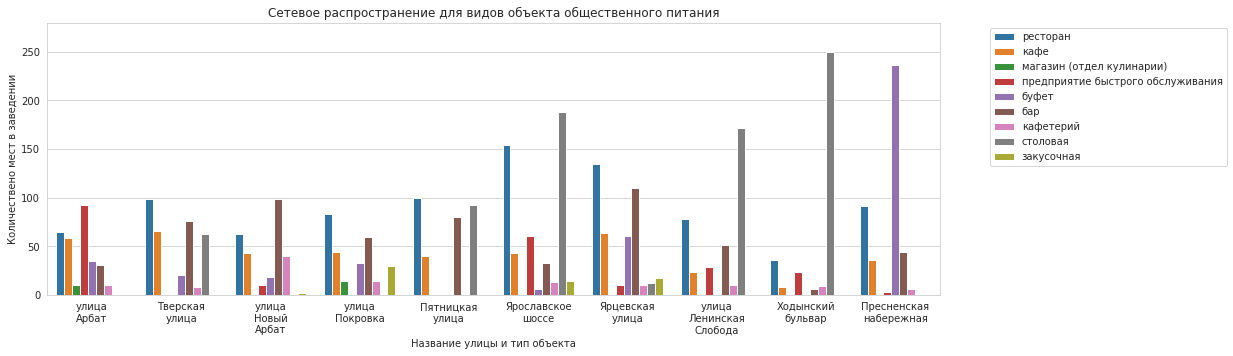

In [29]:
plt.figure(figsize=(16, 5))
sns.set_style("whitegrid") 

# Создадим график с третьим измерением
sns.barplot(x="streetname", y="number", hue="object_type", data=rest_data_10_streets_2, ci=None)

# Добавим подписи к графику
plt.title('Сетевое распространение для видов объекта общественного питания')
plt.xlabel('Название улицы и тип объекта')
plt.ylabel('Количествено мест в заведении')
plt.ylim(0,280)
xlabels = ['улица Арбат', 'Тверская улица', 'улица Новый Арбат', 'улица Покровка', 'Пятницкая улица', 
           'Ярославское шоссе', 'Ярцевская улица', 'улица Ленинская Слобода', 'Ходынский бульвар',
           'Пресненская набережная']
xlabels_new = ["\n".join(label.split()) for label in xlabels]
plt.xticks(range(10), xlabels_new, rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1));

Но по данному графику можно увидеть, что большое количество мест на Ярославском шоссе дают столовые. Если исключить данные заведения, то в большинство мест дают столовые и рестораны. В столовых посадочных мест повсеместно больше.

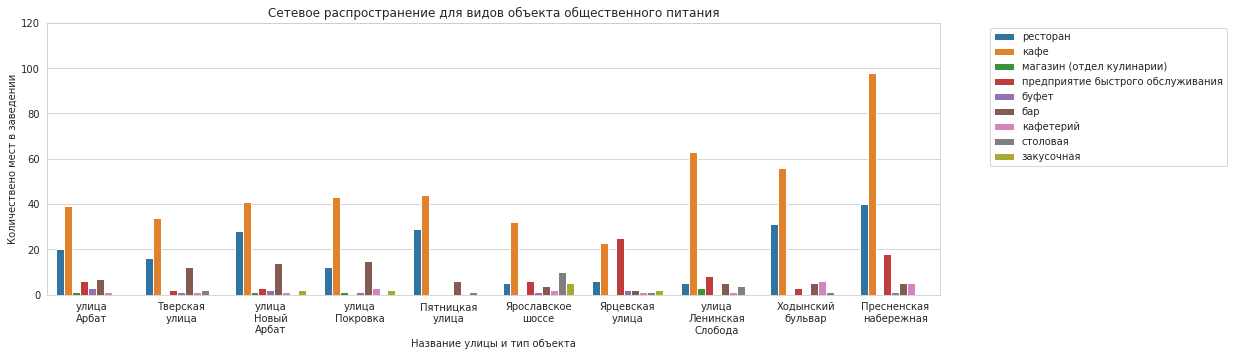

In [30]:
plt.figure(figsize=(16, 5))
sns.set_style("whitegrid") 

rest_data_2 = rest_data_10_streets_2.copy()
rest_data_2['x'] = rest_data_2['id'] / rest_data_2['id']


# Создадим график с третьим измерением
sns.barplot(x="streetname", y="x", hue="object_type", data=rest_data_2, estimator=sum)

# Добавим подписи к графику
plt.title('Сетевое распространение для видов объекта общественного питания')
plt.xlabel('Название улицы и тип объекта')
plt.ylabel('Количествено мест в заведении')
plt.ylim(0,120)
xlabels = ['улица Арбат', 'Тверская улица', 'улица Новый Арбат', 'улица Покровка', 'Пятницкая улица', 
           'Ярославское шоссе', 'Ярцевская улица', 'улица Ленинская Слобода', 'Ходынский бульвар',
           'Пресненская набережная']
xlabels_new = ["\n".join(label.split()) for label in xlabels]
plt.xticks(range(10), xlabels_new, rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1));

## Вывод

В Москве больше всего кафе, их больше 6000.

Сетевых предприятий около 3 тысяч, несетевых больше 12 тысяч.

Для предприятий быстрого питания характерно сетевое распространения, около 41% заведений типа являют сетевыми.

На топ-10 улиц больше всего встречается заведений типа кафе.

Для сетевых предприятий характерно большое количество заведений с небольшим количеством мест. Около 40 мест на заведение.

Лучше всего открыть кафе или предприятие быстрого обслуживания на одной из топа 10 улиц.
Так как баров не так много, и пьяные гости + дорогостояющие роботы - это не лучшее сочетание.
Также для столовой или буфета, нужно будет очень много роботов, что потребует очень большое количество затрат. Или же поставить роботов на раздачу, но не думаю, что это сильно будет привлекать гостей, это очень быстро надоест.

На 40-45 посадочных мест (это среднее количество, что для кафе, что для общепита)

Я бы рекомендовала открыть кафе, так как в нём не такой большой поток посетителей, как в общепите, значит и роботы прослужат дольше.

Ссылка на презентацию: https://drive.google.com/file/d/1smE1BAKXU7EETTV0QDUl_wo8UUy4eSPE/view?usp=sharing